## 2D Corner Data

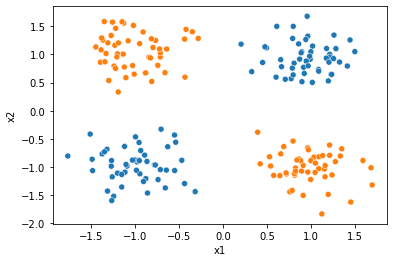

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

x, y = make_blobs(n_samples = [50, 50, 50, 50], n_features = 2, random_state = 0, centers = ((-1, -1), (-1, 1), (1, -1), (1, 1)), cluster_std = 0.3)
df = pd.DataFrame(data = x, columns = ["x1", "x2"])
df["y"] = y
df = df.replace(3, 0)
df = df.replace(2, 1)
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)

In [ ]:
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(3, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Keras models require us to manually specifiy the optimziation function, loss function, and metrics to track as the model is trained.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
np.random.seed(12)
history = model.fit(x = df[["x1", "x2"]],
                    y = df["y"],
                    epochs=5,
                    batch_size=8)

Epoch 1/5
25/25 [==============================] - 1s 3ms/step - loss: 0.6202 - accuracy: 0.7000
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.6800
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.6750
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.6750
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.6850


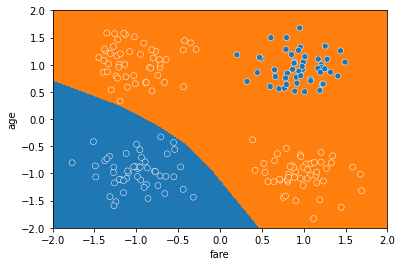

In [ ]:
visualize_decision_boundaries(model, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)


If we create a more complex neural network, we'll require more epochs to train.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

np.random.seed(20)
history = model.fit(x = df[["x1", "x2"]],
                    y = df["y"],
                    epochs=20,
                    batch_size=8)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6526 - accuracy: 0.9400
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.9900
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4918 - accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.9950
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.9950
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.9950
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.9950
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9950
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 1.0000
Epoch 11/20
25/25 [

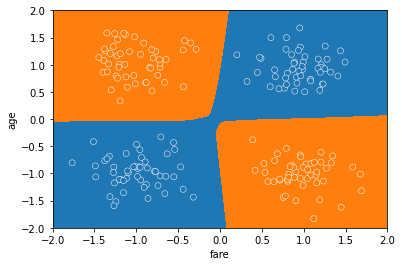

In [ ]:
visualize_decision_boundaries(model, [-2, 2], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)


## Multiclass Example

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [ ]:
from sklearn.utils import shuffle
iris = shuffle(iris)

In [ ]:
iris = iris.replace("versicolor", 0)
iris = iris.replace("setosa", 1)
iris = iris.replace("virginica", 2)

In [ ]:
import numpy as np
train, dev = np.split(iris, [110])

In [ ]:
from sklearn.preprocessing import StandardScaler
std_clf = StandardScaler()
#x_train_new = std_clf.fit_transform(train[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
#x_dev_new = std_clf.transform(dev[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
x_train_new = std_clf.fit_transform(train[["petal_length", "petal_width"]])
x_dev_new = std_clf.transform(dev[["petal_length", "petal_width"]])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train_new,
                    train["species"],
                    epochs=20,
                    batch_size=1,
                    validation_data=(x_dev_new, dev["species"]))

Epoch 1/20
110/110 [==============================] - 1s 5ms/step - loss: 1.0201 - accuracy: 0.5273 - val_loss: 0.8545 - val_accuracy: 0.7750
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 0.7761 - accuracy: 0.6909 - val_loss: 0.5861 - val_accuracy: 0.8000
Epoch 3/20
110/110 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7273 - val_loss: 0.4137 - val_accuracy: 0.8000
Epoch 4/20
110/110 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8000 - val_loss: 0.3365 - val_accuracy: 0.8250
Epoch 5/20
110/110 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8364 - val_loss: 0.2870 - val_accuracy: 0.8750
Epoch 6/20
110/110 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.9000 - val_loss: 0.2452 - val_accuracy: 0.8750
Epoch 7/20
110/110 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9182 - val_loss: 0.2046 - val_accuracy: 0.9750
Epoch 

In [ ]:
class Onehot2Int():

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model(X)
        return np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


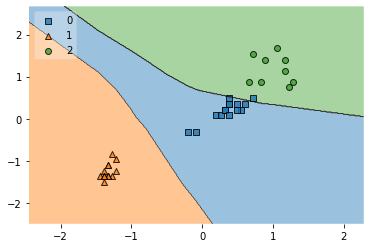

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_dev_new, dev["species"].values, clf=Onehot2Int(model), legend=2)

In [ ]:
def visualize_3class_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

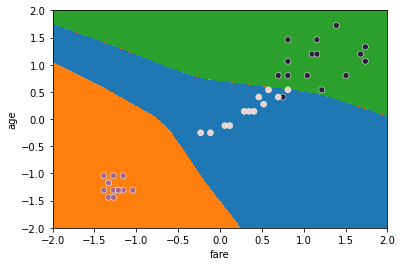

In [ ]:
visualize_3class_decision_boundaries(Onehot2Int(model), [-2, 2], [-2, 2])
sns.scatterplot(x = x_dev_new[:, 0], y = x_dev_new[:, 1], hue = dev["species"].values, legend = False)